In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [2]:
from SHDataset import SHDataset
from utils.utils import *

In [3]:
dataset = SHDataset(noise=True, noise_config=1)
G1,T1,G2,T2 = dataset.read_snapshots(0)

Adding noise to trajectories: 100%|██████████| 89079/89079 [00:57<00:00, 1550.35it/s]


In [35]:
from models.hmm import HMMChangeDetector

G_diff = compare_snapshots(G1,G2)[1]
G_vis = G_diff.copy()

t_idx = 2
t = T2['T'][t_idx]

det = HMMChangeDetector(G1)
states = det.map_match_trajectory(t)

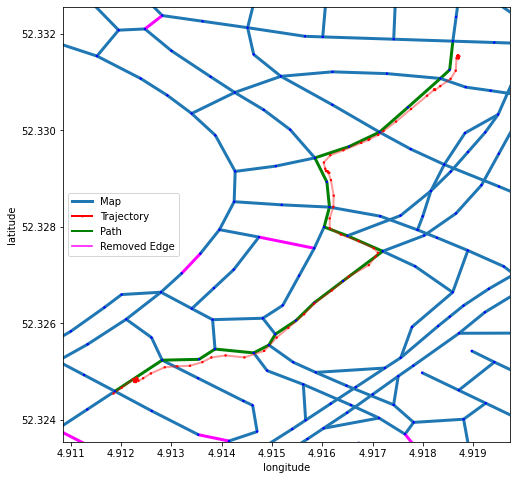

In [44]:

path_colors = {state: 'green' for state in states}
nx.set_edge_attributes(G_vis, path_colors, 'color')
plot_graph(snapshot_to_nxgraph(G_vis, [t]), zoom_on_traj=True, show_nodes=True, T_node_size=2, T_edge_width=2,
          G_edge_width=3, G_node_size=2, traj_alpha=0.4)

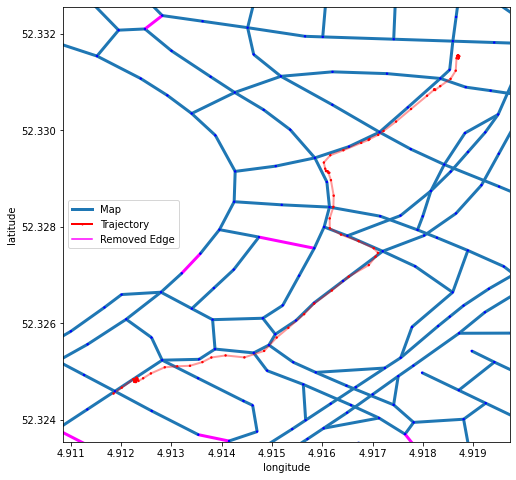

In [45]:
plot_graph(snapshot_to_nxgraph(G_diff, [t]), zoom_on_traj=True, show_nodes=True, T_node_size=2, T_edge_width=2,
          G_edge_width=3, G_node_size=2, traj_alpha=0.4)

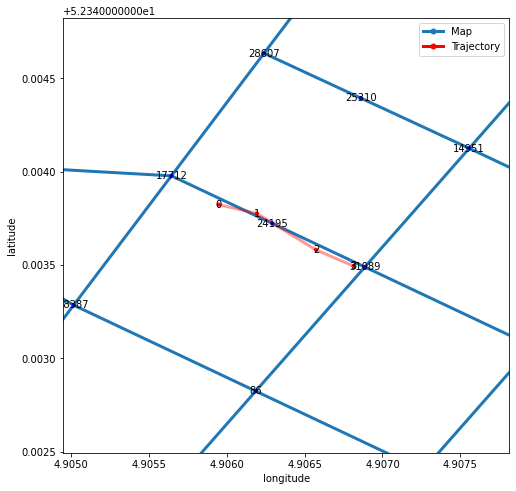

In [18]:
t_idx = 0
t = T2['T'][t_idx][:4]

plot_graph(snapshot_to_nxgraph(G1,[t]), zoom_on_traj=True, show_nodes=True, G_node_size=10, T_node_size=10, 
           G_edge_width=3, T_edge_width=3, traj_alpha=0.4, show_labels=True, fontsize=10)

In [19]:
bbox = (52.335, 52.34, 4.89, 4.90)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

Adding noise to trajectories: 100%|██████████| 3795/3795 [00:00<00:00, 7436.94it/s]


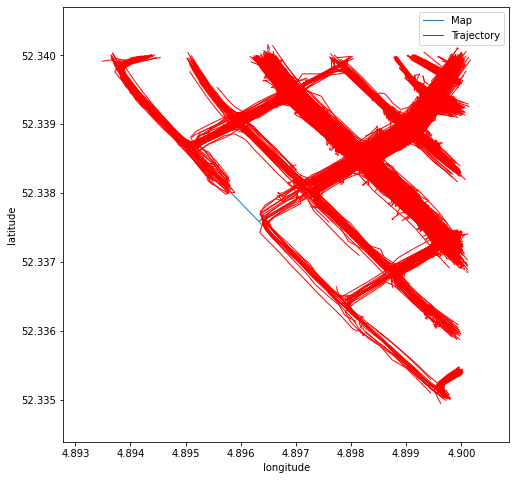

In [20]:
plot_graph(snapshot_to_nxgraph(G1,T2['T']))

In [28]:
from models.histogram import HistogramDetector

det = HistogramDetector(G1, bbox, accumulate_scores_hist=False)

In [29]:
det.forward(T2['T'])

Running Histogram Change Detector: 100%|██████████| 3795/3795 [00:00<00:00, 5779.03it/s]


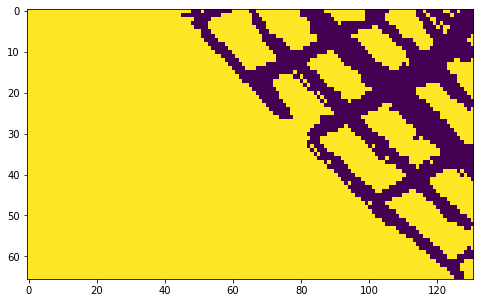

In [30]:
plot_hist(det.hist)